# Análisis de lazo

## Ejemplo 10.4
Determine $V_0$ en el circuito de la figura, aplicando el análisis de lazo.

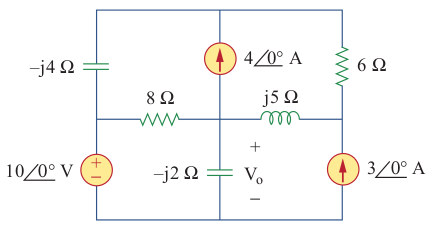

### Solución
Como se señala en la figure, los lazos 3 y 4 forman una supermalla debido a la fuente de corriente entre los lazos. En cuanto al lazo 1, la LTK da por resultado

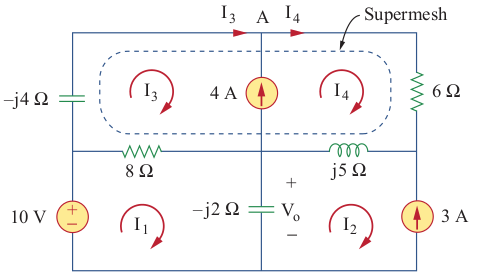

$$ -10 + (8 - j2) I_1 - (-j2) I_2 - 8 I_3 = 0 $$

o sea

$$ (8 - j2) I_1 + j2 I_2 - 8I_3 = 10 \tag{1} $$

En cuanto al lazo 2,
$$ I_2 = -3 \tag{2} $$

En cuanto a la supermalla,

$$ (8 - j4) I_3 - 8 I_1 +(6 + j5) I_4 - j5 I_2 = 0 \tag{3} $$

Debido a la fuente de corriente entre las mallas 3 y 4, en el nodo A,

$$ I_4 = I_3 + 4 \tag{4} $$

### Método 1
En vez de resolver las cuatro ecuaciones anteriores, se reducen a dos por eliminación.

Al combinar las ecuaciones (1) y (2)

$$ (8 - j2) I_1  - 8 I_3 = 10 + j6 \tag{5} $$

Al combinar las ecuaciones (2) a (4)

$$ -8 I_1 + (14 + j) I_3 = -24 - j35 \tag{6} $$

De las ecuaciones (5) y (6) se obtiene la ecuación matricial

$$\left[
\begin{array}{cc}
8 - j2 & -8 \\
-8 & 14 + j
\end{array}
\right]
\left[
\begin{array}{c}
I_1 \\
I_2
\end{array}
\right]
=
\left[
\begin{array}{c}
10 + j6 \\
-24 - j35
\end{array}
\right]
$$

Se obtienen los siguientes determinantes:

$$ \Delta = 
\left|
\begin{array}{cc}
8 - j2 & -8 \\
-8 & 14 + j
\end{array}
\right| $$

In [ ]:
# Importa biblioteca numpy
import numpy as np

In [ ]:
M = np.array([ [8 - 2j , -8],[-8 , 14 + 1j] ])
Delta = np.linalg.det(M)
print('Delta = {:.1f}'.format(Delta))

Delta = 50.0-20.0j


$$ \Delta_1 =
\left|
\begin{array}{cc}
10 + j6 & -8 \\
-24 - j35 & 14 + j
\end{array}
\right|
$$

In [ ]:
M1 = np.array([ [10 + 6j , -8],[-24 - 35j , 14 + 1j] ])
Delta1 = np.linalg.det(M1)
print('Delta1 = {:.1f}'.format(Delta1))

Delta1 = -58.0-186.0j


La corriente $I_1$ se obtiene como

$$ I_1 = \frac{\Delta_1}{\Delta}  $$

In [ ]:
I1 = Delta1/Delta
print('I1 = {:.3f} A'.format(I1))

I1 = 0.283-3.607j A


La tensión requerida $V_0$ es

In [ ]:
I2 = -3

V0 = -2j*(I1 - I2)
print('V0 = {:.3f} V'.format(V0))

V0 = -7.214-6.566j V


In [ ]:
import cmath, math

In [ ]:
V0_pol = cmath.polar(V0)
print('V0 = (%.3f<%.3f rad) V'%V0_pol)
print('V0 = (%.3f<%.2f°) V'%(V0_pol[0],V0_pol[1]*180/math.pi))

V0 = (9.754<-2.403 rad) V
V0 = (9.754<-137.69°) V


### Método 2
Se puede usar Python y la biblioteca numpy para resolver las ecuaciones (1) a (4). Primero se enuncia como

$$\left[
\begin{array}{cccc}
8 - j2 & j2 & -8 & 0 \\
0 & 1 & 0 & 0 \\
-8 & -j5 & 8 - j4 & 6 + j5 \\
0 & 0 & -1 & 1
\end{array}
\right]
\left[
\begin{array}{c}
I_1 \\
I_2 \\
I_3 \\
I_4
\end{array}
\right]
=
\left[
\begin{array}{c}
10 \\
-3 \\
0 \\
4
\end{array}
\right] \tag{7a}$$

o sea
$$ AI=B $$

Al invertir $A$ se puede obtener $I$ como

$$ I = A^{-1} B \tag{7b} $$

Ahora se aplica Python, de esta manera: (usando la biblioteca numpy)

In [ ]:
A = np.array([ [8-2j , 2j , -8 , 0],
                       [0 , 1 , 0 , 0],
                       [-8 , -5j , 8 - 4j , 6 + 5j],
                       [0 , 0 , -1 , 1] ])
B = np.array([ [10] , [-3] , [0] , [4] ])
I = np.dot( np.linalg.inv(A) , B )

In [ ]:
np.set_printoptions(precision=4 , suppress=True)

In [ ]:
print(I)

[[ 0.2828-3.6069j]
 [-3.    +0.j    ]
 [-1.869 -4.4276j]
 [ 2.131 -4.4276j]]


In [ ]:
I1 = I[0] ; I2 = I[1] ; I3 = I[2] ; I4 = I[3]
print('I1 = %s'%I1)
print('I2 = %s'%I2)
print('I3 = %s'%I3)
print('I4 = %s'%I4)

I1 = [0.2828-3.6069j]
I2 = [-3.+0.j]
I3 = [-1.869-4.4276j]
I4 = [2.131-4.4276j]


$$ V_0 = -2j \, (I_1 - I_2) $$

In [ ]:
V0 = -2j*(I1 - I2)
print('V0 = %s V'%V0)

V0 = [-7.2138-6.5655j] V


Como se obtuvo anteriormente.